https://github.com/joelgrus/data-science-from-scratch/tree/master/code

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
%run "4 - Linear Algebra.ipynb"

In [40]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [41]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)

6.0

In [42]:
def quantile(x, p):
    """returns the pth-percentile value"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

[quantile(num_friends, 0.10),
 quantile(num_friends, 0.25),
 quantile(num_friends, 0.50),
 quantile(num_friends, 0.75),
 quantile(num_friends, 0.90)]

[1, 3, 6, 9, 13]

In [43]:
from collections import Counter

def mode(x):
    """returns list of most common value"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

In [44]:
def stats_range(x):
    return max(x) - min(x)

stats_range(num_friends)

99

In [45]:
def de_mean(x):
    """translate x by subtracting its mean (results in new overall mean of 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """calculates variance of elements of x"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

The variance is in squared units which can make it difficult to grasp. An easier to understand measure is the _standard deviation_.

In [46]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [47]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

# Correlation

We saw that _variance_ measures a single variable's deviation from the mean, now we will see _covariance_ and how it measures how two variables in tandem deviate.

In [48]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

Covariance can be hard to interpret because:
- its units are the same as the inputs' units.
- it is hard to settle on what counts as a "large" covariance.

_Correlation_ is an easier to understand measure. It has no units and is always between -1 and 1.

In [49]:
def correlation(x, y):
    sd_x = standard_deviation(x)
    sd_y = standard_deviation(y)
    if sd_x > 0 and sd_y > 0:
        return covariance(x, y) / sd_x / sd_y
    else:
        return 0 # correlation is 0 when there is no variation

correlation(num_friends, daily_minutes)

0.24736957366478218

Outliers can greatly affect correlation. One stands out:

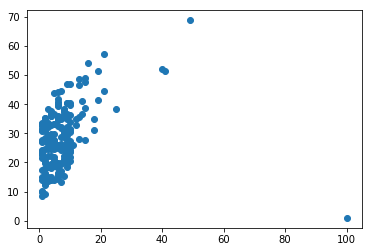

In [52]:
plt.scatter(num_friends, daily_minutes);

Re-check correlation after removing the outlier:

In [56]:
outlier = num_friends.index(100)

num_friends_clean = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_clean = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_clean, daily_minutes_clean)

0.5736792115665573